# Data Analysis Notebook 

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


## EE of the Cut for large range of system sizes


In [54]:
Sys.CPU_THREADS

6

In [55]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
dep_path = "../AdditionalStructure/Julia/"
include("$(dep_path)NewTypes.jl")
include("$(dep_path)BitStringOps.jl")
include("$(dep_path)Measurements.jl")
include("$(dep_path)MICModels.jl")
include("$(dep_path)ModelRuns.jl")
include("$(dep_path)HelperTools.jl")
include("$(dep_path)Iterators.jl");

exp_index = 14
dir_extension = ""
file_prefix = "out/"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


exp_index: 14
p_b: 0.15
TEE: [0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [56]:
all_data = []

model_data_dict = Dict()

for exp_index in 1:800
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
        model_data_dict[(data["L"], data["p_b"], data["p_f"])] = data
    end
end
print("data sets read: ",length(all_data))

all_sizes = sort(collect(keys(model_data_dict)))

data sets read: 451

451-element Vector{Any}:
 (18, 0.0, 0.0)
 (18, 0.0, 0.05)
 (18, 0.0, 0.1)
 (18, 0.0, 0.15)
 (18, 0.0, 0.2)
 (18, 0.0, 0.25)
 (18, 0.0, 0.3)
 (18, 0.0, 0.35)
 (18, 0.0, 0.4)
 (18, 0.0, 0.45)
 ⋮
 (30, 0.8, 0.2)
 (30, 0.85, 0.0)
 (30, 0.85, 0.05)
 (30, 0.85, 0.1)
 (30, 0.85, 0.15)
 (30, 0.9, 0.0)
 (30, 0.9, 0.05)
 (30, 0.9, 0.1)
 (30, 0.95, 0.05)

In [57]:
model_data_dict[(18, 0.15, 0.0)]

Dict{String, Any} with 15 entries:
  "exp_index"         => 214
  "p_b"               => 0.15
  "TEE"               => [1, 2, 2, 3, 2, 2, 2, 1, 2, 2  …  2, 1, 2, 2, 2, 2, 1,…
  "Other_Boson_Boson" => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0,…
  "L"                 => 18
  "p_f"               => 0.0
  "sys_type"          => "Init_EdgeSquareLattice_KitaevDoNuT"
  "EE_cut"            => [32, 29, 31, 33, 33, 31, 36, 32, 33, 33  …  30, 33, 31…
  "t_mmt"             => [70, 90, 110, 130, 150, 170, 190, 210, 230, 250  …  19…
  "Fermion_Fermion"   => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0,…
  "TEN"               => [0.0, 1.0, 1.0, 1.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0  …  …
  "Boson_Boson"       => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0,…
  "filename"          => "/mnt/users/jovanovic/GitHub/Subsystem-Code-Physics/Re…
  "description"       => "Singel Point in Phase Diagram. Full Scan of relevant …
  "d"                 => 3

In [58]:
function give_type(data)
    return (data["L"], data["p_b"], data["p_f"])
end

give_type (generic function with 1 method)

In [59]:
Data_dict = Dict()

for data in all_data
    L, p_b, p_f = give_type(data)
    Data_dict[L] = Dict()
end

for data in all_data
    L, p_b, p_f = give_type(data)
    p_b = round(p_b, digits=5)
    p_f = round(p_f, digits=5)
    Data_dict[L][(p_b, p_f)] = Dict(
        "mean" => Dict(
            "EE_cut" => mean(data["EE_cut"]),
            "TEE" => mean(data["TEE"]),
            "Fermion_Fermion" => mean(data["Fermion_Fermion"]),
            "Boson_Boson" => mean(data["Boson_Boson"]),
            "Other_Boson_Boson" => mean(data["Other_Boson_Boson"]),
            "TEN" => mean(data["TEN"]),
            ),
        "var" => Dict(
            "EE_cut" => std(data["EE_cut"]),
            "TEE" => std(data["TEE"]),
            "Fermion_Fermion" => std(data["Fermion_Fermion"]),
            "Boson_Boson" => std(data["Boson_Boson"]),
            "Other_Boson_Boson" => std(data["Other_Boson_Boson"]),
            "TEN" => std(data["TEN"]),
            ),
        "median" => Dict(
            "EE_cut" => median(data["EE_cut"]),
            "TEE" => median(data["TEE"]),
            "Fermion_Fermion" => median(data["Fermion_Fermion"]),
            "Boson_Boson" => median(data["Boson_Boson"]),
            "Other_Boson_Boson" => median(data["Other_Boson_Boson"]),
            "TEN" => median(data["TEN"]),
            ),
        "err" => Dict(
            "EE_cut" => std(data["EE_cut"])/sqrt(length(data["EE_cut"])),
            "TEE" => std(data["TEE"])/sqrt(length(data["TEE"])),
            "Fermion_Fermion" => std(data["Fermion_Fermion"])/sqrt(length(data["Fermion_Fermion"])),
            "Boson_Boson" => std(data["Boson_Boson"])/sqrt(length(data["Boson_Boson"])),
            "Other_Boson_Boson" => std(data["Other_Boson_Boson"])/sqrt(length(data["Other_Boson_Boson"])),
            "TEN" => std(data["TEN"])/sqrt(length(data["TEN"])),
            )
        )
end

In [60]:
L = 18
stat = "mean"
variable = "Boson_Boson"
points = []
cutoff = 100

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = Data_dict[L][key][stat][variable]
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_1 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")


variable = "Fermion_Fermion"
points = []
cutoff = 100

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = Data_dict[L][key][stat][variable]
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_2 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")


variable = "Other_Boson_Boson"
points = []
cutoff = 100

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = Data_dict[L][key][stat][variable]
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")

plot(p_1, p_2, p_3, layout = (1,3), size = (1500, 500), dpi = 300, title="", left_margin = 10Plots.mm, right_margin = 10Plots.mm, top_margin = 10Plots.mm, bottom_margin = 10Plots.mm)
savefig("PLots/L:$L:Corrs.pdf")

"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/PLots/L:18:Corrs.pdf"

In [61]:
L = 30
stat = "mean"
variable = "TEE"
points = []
cutoff = 5

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_1 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")


variable = "EE_cut"
points = []
cutoff = 100

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_2 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")


variable = "TEN"
points = []
cutoff = 5

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = max(min(Data_dict[L][key][stat][variable], cutoff), - cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")

plot(p_1, p_2, p_3, layout = (1,3), size = (1500, 500), dpi = 300, title="", left_margin = 10Plots.mm, right_margin = 10Plots.mm, top_margin = 10Plots.mm, bottom_margin = 10Plots.mm)
savefig("PLots/L:$L:TopoE.pdf")

"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/PLots/L:30:TopoE.pdf"

In [62]:
L = 18
stat = "mean"
variable = "TEE"
points = []
cutoff = 5

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_1 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")


variable = "EE_cut"
points = []
cutoff = 100

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_2 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")


variable = "TEN"
points = []
cutoff = 5

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = max(min(Data_dict[L][key][stat][variable], cutoff), - cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")

plot(p_1, p_2, p_3, layout = (1,3), size = (1500, 500), dpi = 300, title="", left_margin = 10Plots.mm, right_margin = 10Plots.mm, top_margin = 10Plots.mm, bottom_margin = 10Plots.mm)
savefig("PLots/L:$L:TopoE.pdf")

"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/PLots/L:18:TopoE.pdf"

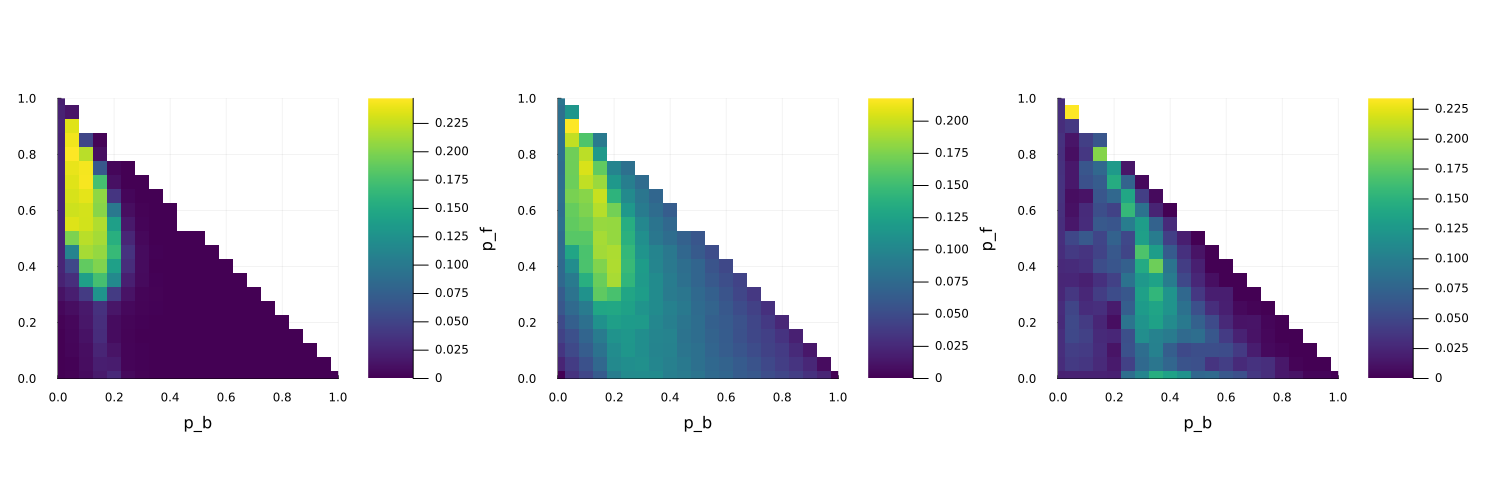

In [63]:
L = 18
stat = "err"
variable = "TEE"
points = []
cutoff = 5

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_1 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")

stat = "err"
variable = "EE_cut"
points = []
cutoff = 100

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_2 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")

stat = "err"
variable = "TEN"
points = []
cutoff = 100

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cutoff)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable")

plot(p_1, p_2, p_3, layout = (1,3), size = (1500, 500), title = "")

In [68]:
L = 18
stat = "mean"
error = "err"
variable_1 = "Fermion_Fermion"
variable_2 = "Boson_Boson"
variable_3 = "EE_cut"
variable_4 = "TEE"
cut_off_4 = 1000
p_b_arr = [0.00, 0.05, 0.10, 0.15, 0.20]

p_b_arr_1 = repeat([0.10], outer = 13)
p_f_arr_1 = Array{Float64}(0.10:0.05:0.70)

p_b_arr_2 = round.([0.10+i*0.05 for i in 1:12], digits=5)
p_f_arr_2 = round.([0.70-0.05*i for i in 1:12], digits=5)

p_b_arr_3 = Array{Float64}(0.65:-0.05:0.10)
p_f_arr_3 = repeat([0.10], outer = 12)

p_b_arr = [p_b_arr_1; p_b_arr_2; p_b_arr_3]
p_f_arr = [p_f_arr_1; p_f_arr_2; p_f_arr_3]

points = []
for i in 1:length(p_b_arr)

    p_b = p_b_arr[i]
    p_f = p_f_arr[i]


    for key in keys(Data_dict[L])
        if key[1] == p_b && key[2] == p_f
            push!(points, (key[1], key[2], Data_dict[L][(key[1], key[2])][stat][variable_1], Data_dict[L][(key[1], key[2])][error][variable_1], Data_dict[L][(key[1], key[2])][stat][variable_2], Data_dict[L][(key[1], key[2])][error][variable_2], Data_dict[L][(key[1], key[2])][stat][variable_3], Data_dict[L][(key[1], key[2])][error][variable_3], min(Data_dict[L][(key[1], key[2])][stat][variable_4], cut_off_4), Data_dict[L][(key[1], key[2])][error][variable_4]))
        end
    end
    
    
end

p_1 = plot(1:length(points), [point[3] for point in points], xlabel="pathlength", ylabel="Corrs", title="Plot of $variable_1 for L=$L", label=variable_1, yerr=[point[4] for point in points], markersize=1)
p_1 = plot!(1:length(points), [point[5] for point in points], xlabel="pathlength", ylabel="Corrs", title="Plot of $variable_2 for L=$L", label=variable_2, yerr=[point[6] for point in points], markersize=1)
p_2 = plot(1:length(points), [point[7] for point in points], xlabel="pathlength", ylabel="Ents", title="Plot of $variable_3 for L=$L", label=variable_3, yerr=[point[8] for point in points], markersize=1)
p_2 = plot!(1:length(points), [point[9] for point in points], xlabel="pathlength", ylabel="Ents", title="Plot of $variable_4 for L=$L", label=variable_4, yerr=[point[10] for point in points], markersize=1)

stat = "mean"
variable = "TEE"
cut_off = 4

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cut_off)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, Stat: $stat, Variable: $variable", cbar = false)
p_3 = plot!(p_b_arr, p_f_arr, linewidth=2, label="Data points", arrow=true)
p_3 = plot!(legend=false)

plot(p_1, p_2, p_3, layout = (1,3), size = (1500, 500), dpi = 300, title="", left_margin = 10Plots.mm, right_margin = 10Plots.mm, bottom_margin = 10Plots.mm, top_margin = 10Plots.mm)
savefig("PLots/L:$L:Triangle.pdf")


"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/PLots/L:18:Triangle.pdf"

In [67]:
L = 18
stat = "mean"
error = "err"
variable_1 = "Fermion_Fermion"
variable_2 = "Boson_Boson"
variable_3 = "EE_cut"
variable_4 = "TEE"
cut_off_4 = 100
p_b_arr = [0.00, 0.05, 0.10, 0.15, 0.20]

p_b_arr_1 = repeat([0.10], outer = 13) .- 0.1
p_f_arr_1 = Array{Float64}(0.10:0.05:0.70)

p_b_arr_2 = round.([0.10+i*0.05 for i in 1:12], digits=5) .- 0.1
p_f_arr_2 = round.([0.70-0.05*i for i in 1:12], digits=5)

p_b_arr_3 = Array{Float64}(0.65:-0.05:0.10) .- 0.1
p_f_arr_3 = repeat([0.10], outer = 12)

p_b_arr = [p_b_arr_1; p_b_arr_2; p_b_arr_3]
p_f_arr = [p_f_arr_1; p_f_arr_2; p_f_arr_3] 

points = []
for i in 1:length(p_b_arr)

    p_b = p_b_arr[i]
    p_f = p_f_arr[i]


    for key in keys(Data_dict[L])
        if key[1] == p_b && key[2] == p_f
            push!(points, (key[1], key[2], Data_dict[L][(key[1], key[2])][stat][variable_1], Data_dict[L][(key[1], key[2])][error][variable_1], Data_dict[L][(key[1], key[2])][stat][variable_2], Data_dict[L][(key[1], key[2])][error][variable_2], Data_dict[L][(key[1], key[2])][stat][variable_3], Data_dict[L][(key[1], key[2])][error][variable_3], min(Data_dict[L][(key[1], key[2])][stat][variable_4], cut_off_4), Data_dict[L][(key[1], key[2])][error][variable_4]))
        end
    end
    
    
end

p_1 = plot(1:length(points), [point[3] for point in points], xlabel="pathlength", ylabel="Corrs", title="Plot of $variable_1 for L=$L", label=variable_1, yerr=[point[4] for point in points], markersize=1)
p_1 = plot!(1:length(points), [point[5] for point in points], xlabel="pathlength", ylabel="Corrs", title="Plot of $variable_2 for L=$L", label=variable_2, yerr=[point[6] for point in points], markersize=1)
p_2 = plot(1:length(points), [point[7] for point in points], xlabel="pathlength", ylabel="Ents", title="Plot of $variable_3 for L=$L", label=variable_3, yerr=[point[8] for point in points], markersize=1)
p_2 = plot!(1:length(points), [point[9] for point in points], xlabel="pathlength", ylabel="Ents", title="Plot of $variable_4 for L=$L", label=variable_4, yerr=[point[10] for point in points], markersize=1)

stat = "mean"
variable = "TEE"
cut_off = 4

N = 21
to_map = fill(NaN, N, N)

for key in keys(Data_dict[L])
    p_b, p_f = key
    i = Int(round(p_b*(N-1)))
    j = Int(round(p_f*(N-1)))
    to_map[i + 1, j + 1] = min(Data_dict[L][key][stat][variable], cut_off)
end

p_b = [i/(N-1) for i in 0:(N-1)]
p_f = [i/(N-1) for i in 0:(N-1)]
p_3 = heatmap(p_b, p_f, to_map', aspect_ratio=1, c=:viridis, xlabel="p_b", ylabel="p_f", xlim=(0,1), ylim=(0,1), title="L = $L, $stat $variable", cbar=false)
p_3 = plot!(p_b_arr, p_f_arr, linewidth=2, label="Data points", arrow=true)
p_3 = plot!(legend=false)

plot(p_1, p_2, p_3, layout = (1,3), size = (1500, 500), dpi = 300, title="", left_margin = 10Plots.mm, right_margin = 10Plots.mm, bottom_margin = 10Plots.mm, top_margin = 10Plots.mm)
savefig("PLots/L:$L:Triangle_crit.pdf")


"/Users/jovanjovanovic/GitHub/Subsystem-Code-Physics/Toric_Code/PLots/L:18:Triangle_crit.pdf"